## Introduction

The easy questions and questions after 2m3 can be resolved with algebra, so they are not in this notebook. If you need their resolution, you can follow another material, such as [wjakethompson](https://sr2-solutions.wjakethompson.com/linear-models-causal-inference.html), [xcelab](xcelab.net/rmpubs/rethinking/rethinking_solutions_2.pdf) or [erikkusch](https://www.erikkusch.com/courses/rethinking/chapter-02/).

Config

In [2]:
import os
import arviz as az
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import random

import numpyro  
import numpyro.distributions as dist
from typing import List

if "SVG" in os.environ:
    %config InlineBackend.figure_formats = ["svg"]

az.style.use("arviz-darkgrid")
numpyro.set_platform("cpu")

#### 2M1
Recall the globe tossing model from the chapter. Compute and plot the grid approximate
posterior distribution for each of the following sets of observations. In each case, assume a uniform
prior for p.
- (1) W, W, W
- (2) W, W, W, L
- (3) L, W, W, L, W, W, W

To calculate the posteriori distribution we will multiply the likelihood by the prior and normalize it to sum one. 

Steps:

0. Represent the outcomes as python list

1. Define a vector with values that represent probabilities in an uniform distribution. This vector will contitue the grid of our grid approximation method. This vector can have as many elements as you want, I'll make 9 elements. The probability is bounded between 0-1.

2. Define a vector of prior values. All priors have same probabily, so it can be a vector of ones. 

3. Calculate the parameters of the distribution for grid approximation
3-1. Parameters of binomial distribution
3-1-1. Total number of events
3-1-2. Total number of positive outcomes (Water)

4. Calculate the likelihood given the parameters

5. Calculate the posteriori

6. Plot the posteriori probabily to have a better intuition about results. 

7. Wrap all in a function to avoid write repeated code


In [3]:
# 0. Represent the outcomes as python list
out_1 = ['W', 'W', 'W']
out_2 = ['W', 'W', 'W','L']
out_3 = ['L','W', 'W', 'L','W', 'W','W']

In [4]:
#1. Define a vector with values that represent probabilities in an uniform distribution. 
num_elements = 9
p_grid = jnp.linspace(start = 0, stop=1, num=num_elements)

In [5]:
#2. Define a vector of prior values. All priors have same probabily, so it can be a vector of ones.
prior = jnp.repeat(1,num_elements)

In [6]:
# 3-1-1. Total number of events
n_events = len(out_1)

# 3-1-2. Total number of positive outcomes (Water)
n_positives = len([ele for ele in out_1 if ele == 'W'])

In [7]:
#4. Calculate the likelihood given the parameters
likelihood = jnp.exp(dist.Binomial(
                    total_count=n_events, 
                    probs = p_grid).log_prob(n_positives))

In [8]:
#5 Calculate the posteriori
posterior_distribution = likelihood * prior
posterior_distribution = posterior_distribution/posterior_distribution.sum()

Text(0.5, 1.0, 'Number of considered points 9 - W,W,W')

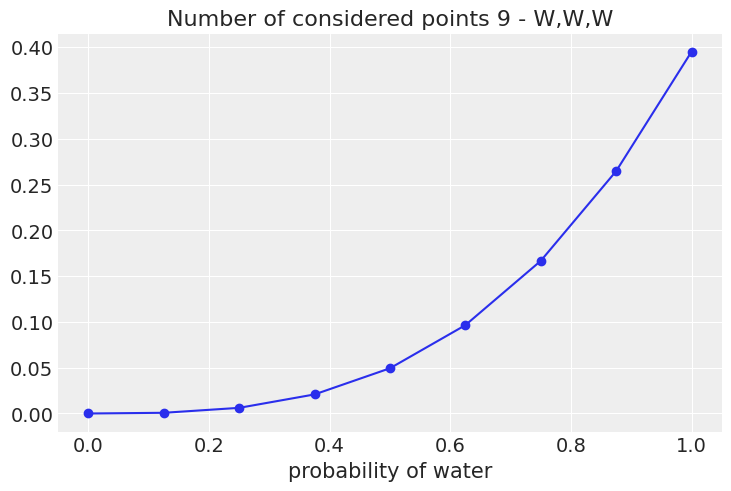

In [9]:
#6. Plot to have a better intuition about results.
plt.plot(p_grid, posterior_distribution, "-o")
plt.xlabel('probability of water')
plt.ylabel = ('posterior probability')
plt.title(f"Number of considered points {num_elements} - {','.join(out_1)}")


In [13]:
# 7. Wrap all in a function to avoid write repeated code
def calc_posteriori_2M1(outcome: List[str], num_elements: int):
    """Calculate and plot a binomial distribution given a list of outcomes and a number of elements to consider.

    The prior is a uniform distribution. 

    Args:
        outcome (List[str]): List of possible outcomes.
        num_elements (int): Number of probabilities considered.
    """    
    p_grid = jnp.linspace(start = 0, stop=1, num=num_elements)
    prior = jnp.repeat(1,num_elements)
    n_events = len(outcome)
    n_positives = len([ele for ele in outcome if ele == 'W'])
    
    likelihood = jnp.exp(dist.Binomial(
                    total_count=n_events, 
                    probs = p_grid).log_prob(n_positives))
    
    posterior_distribution = likelihood * prior
    posterior_distribution = posterior_distribution/posterior_distribution.sum()

    plt.plot(p_grid, posterior_distribution, "-o")
    plt.xlabel('probability of water')
    plt.ylabel = ('posterior probability')
    plt.title(f"Number of considered points {num_elements} - {','.join(outcome)}")
    plt.show()


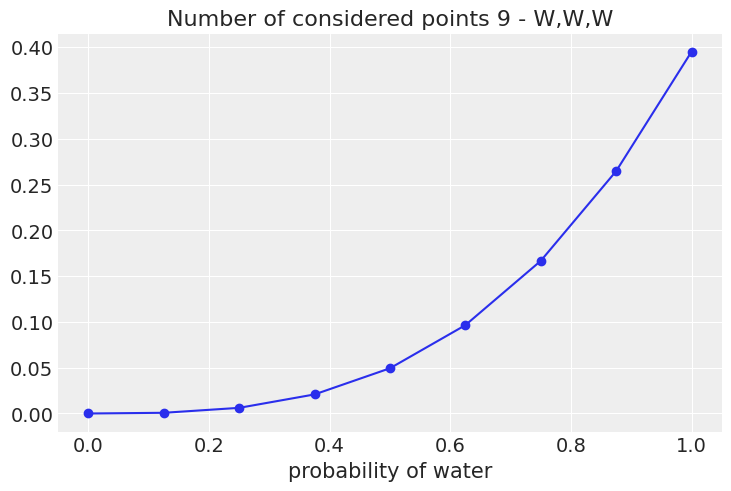

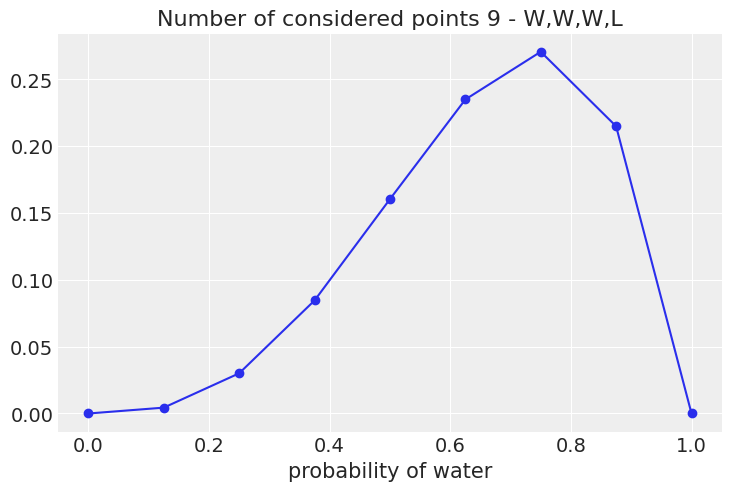

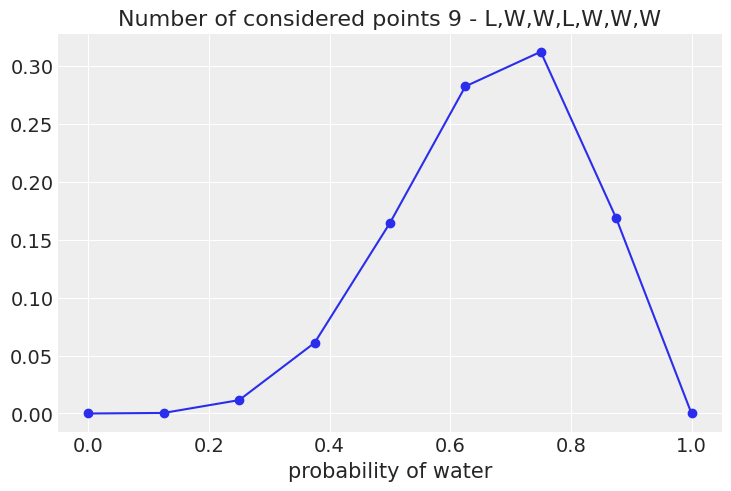

In [14]:
calc_posteriori_2M1(out_1, num_elements)
calc_posteriori_2M1(out_2, num_elements)
calc_posteriori_2M1(out_3, num_elements)

#### 2M2

Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when
p ≥ 0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of
observations in the problem just above.

We can solve the same way as 2M1, but modifying the prior.

In [42]:
# 1. Define a vector with values that represent probabilities in an uniform distribution. 
prior = jnp.repeat(1,num_elements)

In [43]:
# 1.1 Modify prior
prior = jnp.where(p_grid<0.5, 0 , 1)

Repeat all the proccedure with that difference of modified prior.

In [18]:
def calc_posteriori_2M2(outcome:List[str], num_elements:int):
    """Calculate and plot a binomial distribution given a list of outcomes and a number of elements to consider.

    The prior is a uniform distribution. 

    Args:
        outcome (List[str]): List of possible outcomes.
        num_elements (int): Number of probabilities considered.
    """
    p_grid = jnp.linspace(start = 0, stop=1, num=num_elements)
    prior = jnp.repeat(1,num_elements)
    prior = jnp.where(p_grid<0.5, 0 , 1) # New line
    n_events = len(outcome)
    n_positives = len([ele for ele in outcome if ele == 'W'])

    likelihood = jnp.exp(dist.Binomial(
                    total_count=n_events, 
                    probs = p_grid).log_prob(n_positives))

    posterior_distribution = likelihood * prior
    posterior_distribution = posterior_distribution/posterior_distribution.sum()

    plt.plot(p_grid, posterior_distribution, "--")
    plt.xlabel('probability of water')
    plt.ylabel = ('posterior probability')
    plt.title(f"Number of considered points {num_elements} - {','.join(outcome)}")
    plt.show()

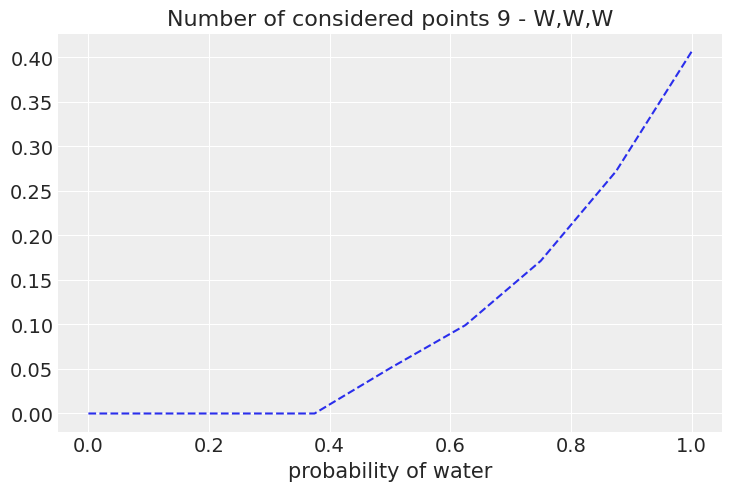

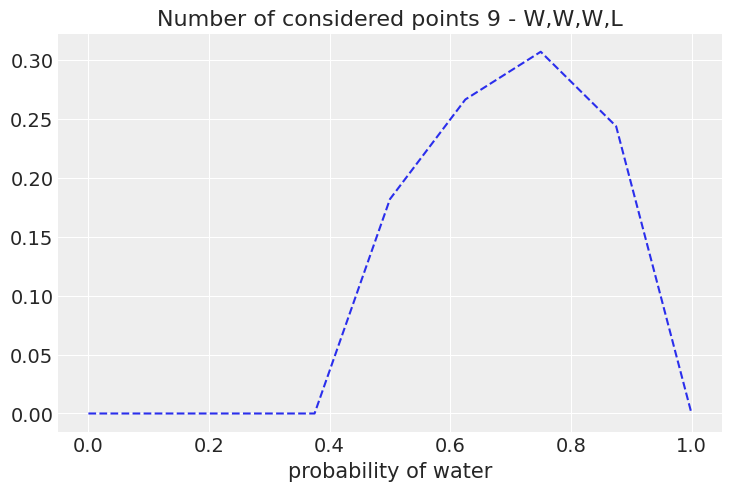

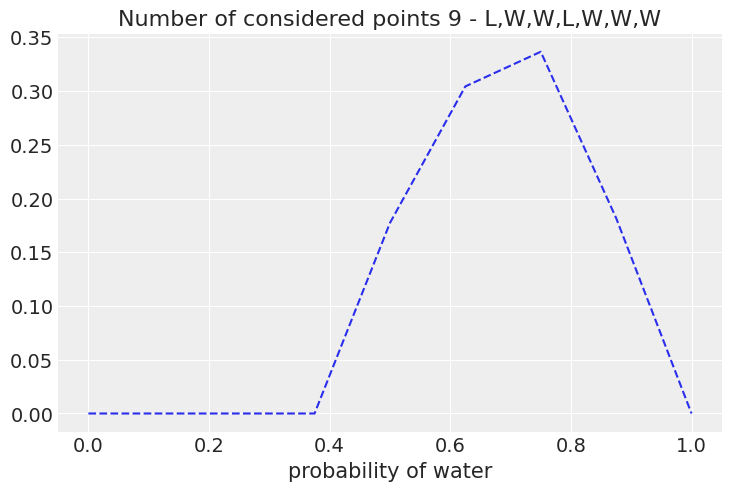

In [19]:
calc_posteriori_2M2(out_1, num_elements)
calc_posteriori_2M2(out_2, num_elements)
calc_posteriori_2M2(out_3, num_elements)

#### 2M3

Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water. The Mars globe is 100% land. Further suppose that one of these globes—you don’t know which—was tossed in the air and produced a “land” observation. Assume that each globe was equally likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on seeing “land” (Pr(Earth|land)), is 0.23.

In [21]:
probability_land_earth = 0.3
probability_land_mars = 1.0
probability_earth = 0.5
probability_land = (probability_earth * probability_land_earth) + ((1 - probability_earth) * probability_land_mars)

# Bayes' Theorem
p_el = (probability_land_earth * probability_earth) / probability_land

print(f'{p_el:.2f}')

0.23


#### Consideration

At the next exercices there is no need of simulations, the best would be to do them with pen and paper. 